<a href="https://colab.research.google.com/github/ZamWayne/Machine-Learning-Task/blob/main/Tugas%2011/Azam_A_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama :Azam Auliyaa

NIM :1103204205

Dataset :CIFAR 10

https://chatgpt.com/share/1259fc74-bec4-46f9-a083-b5c020b16a87

In [1]:
# Impor library yang diperlukan
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Memuat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai pixel antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Konversi label kelas menjadi format biner
num_classes = 10
train_labels_bin = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_bin = tf.keras.utils.to_categorical(test_labels, num_classes)

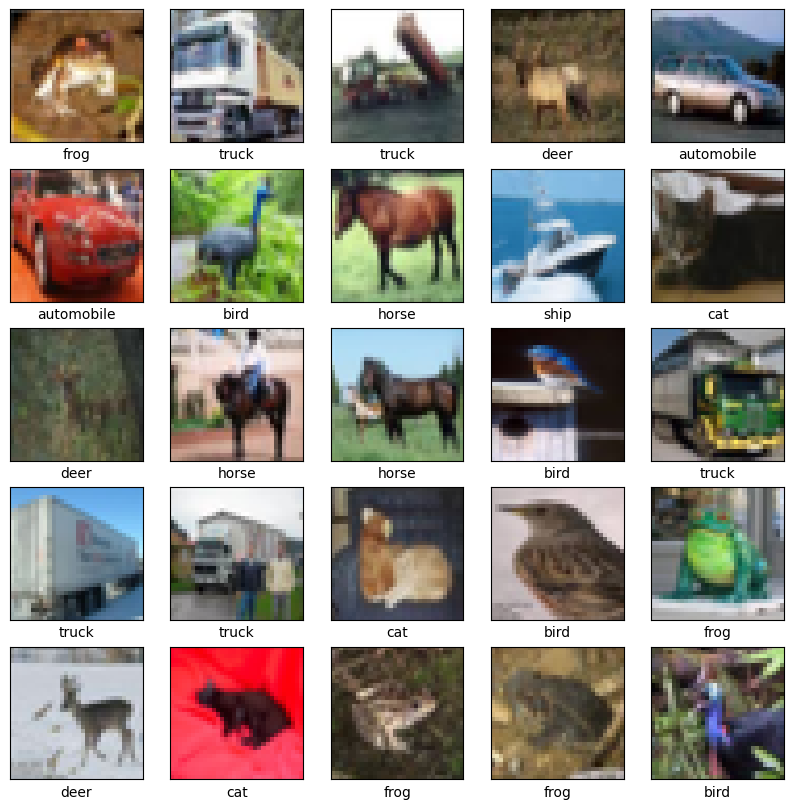

In [4]:
# Menampilkan beberapa contoh gambar
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
# Membuat arsitektur model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])
# Menampilkan ringkasan model
model.summary()

# Menambahkan layer Dense untuk klasifikasi
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # 10 kelas output

# Menampilkan ringkasan model setelah ditambahkan layer Dense
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [6]:
# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 88s 53ms/step - loss: 1.5277 - accuracy: 0.4411 - val_loss: 1.2172 - val_accuracy: 0.5644
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1436 - accuracy: 0.5951 - val_loss: 1.0815 - val_accuracy: 0.6186
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0047 - accuracy: 0.6487 - val_loss: 1.0769 - val_accuracy: 0.6336
Epoch 4/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.9157 - accuracy: 0.6771 - val_loss: 0.9109 - val_accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8517 - accuracy: 0.7007 - val_loss: 0.9396 - val_accuracy: 0.6737
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7999 - accuracy: 0.7162 - val_loss: 0.9350 - val_accuracy: 0.6726
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7516 - accuracy: 0.7371 - val_loss: 0.8634 -

313/313 [==============================] - 4s 12ms/step


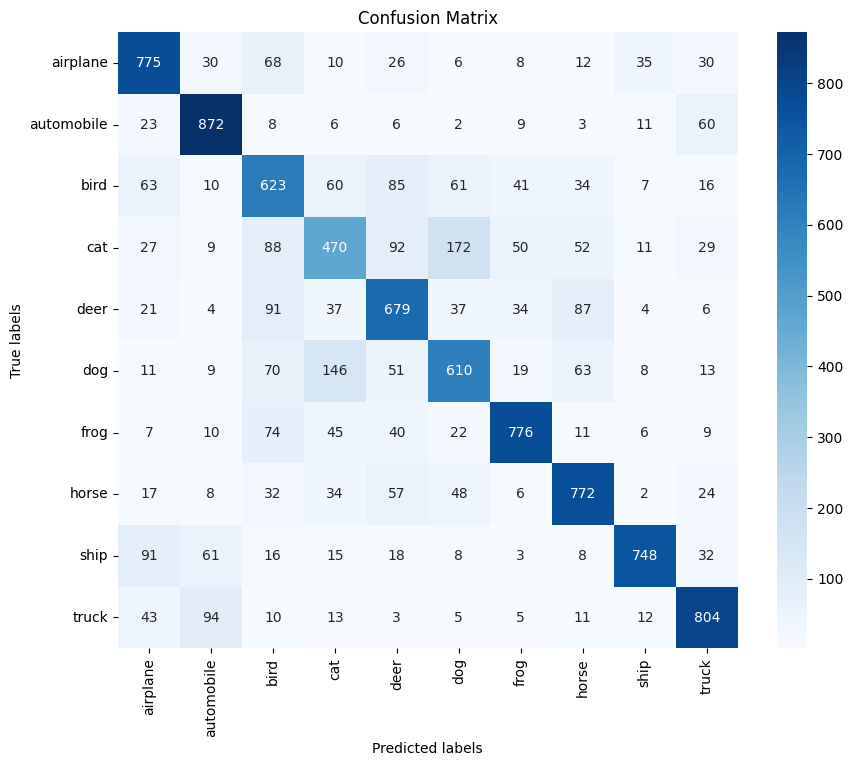

In [8]:
# Membuat prediksi kelas untuk data pengujian
predictions = np.argmax(model.predict(test_images), axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

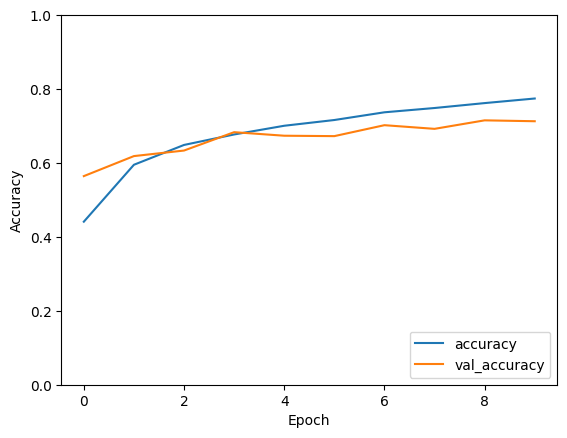

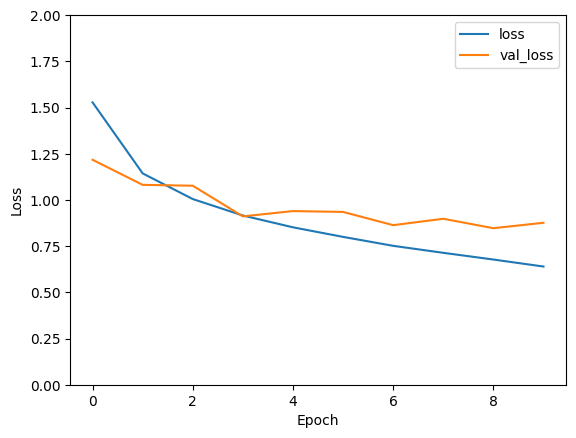

In [7]:
# Menampilkan kurva akurasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Menampilkan kurva loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()